In [38]:
# Linear regression -> Fitting y = wx + b to observed data

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# generate some data
# np.linspace returns evely spaced numbers over a specified interval
# Newaxis is used to increase the dimension of the existing array by one more 
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
print(data_x.shape)
# data.linspace.shape = (x,) data_x.shape = (x, 1)
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
# normalization = helps in keeping the algorithm numerically stable
data_x /= np.max(data_x)
print(data_x.shape)

(100, 1)
(100, 1)


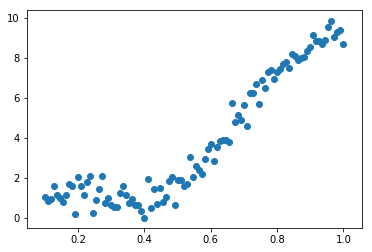

In [41]:
plt.scatter(data_x, data_y)

In [42]:
# TRICK including the intercept in the input values, this way we dont have to carry 
#the bias (b) term through the calculation, that’s done by adding a column of 
#ones to the data, this way our model becomes simply y=wTx.

# Stack arrasy in sequence horizontally (column wise)
# Return an array of ones with the same shape and type as a given array.
print(data_x.shape)
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x.shape


(100, 1)


(100, 2)

In [43]:
m = len(data_x)

In [44]:
# We now shuffle and segment our data in training and test sets
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(train_x.shape)
print(train_y.shape)


(80, 2)
(80, 1)


In [45]:
def get_gradient(w, x, y):
    # .dot product of two arrays
    # Return a copy of the array collapsed into one dimension.
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, (np.sum((error)**2)) / m

In [46]:
w = np.random.randn(2)
alpha = 0.1
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
print(type(iterations))
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged.")
        break
    
    # Print error every 50 iterations
    if iterations % 100 == 0:
        print ("Iteration: %d - Error: %f" %(iterations,error))
    iterations += 1
    w = new_w

<class 'int'>
Iteration: 100 - Error: 2.535954
Iteration: 200 - Error: 1.655978
Iteration: 300 - Error: 1.352408
Iteration: 400 - Error: 1.247684
Iteration: 500 - Error: 1.211557
Iteration: 600 - Error: 1.199094
Iteration: 700 - Error: 1.194794
Iteration: 800 - Error: 1.193311
Iteration: 900 - Error: 1.192800
Iteration: 1000 - Error: 1.192623
Iteration: 1100 - Error: 1.192562
Iteration: 1200 - Error: 1.192541
Iteration: 1300 - Error: 1.192534
Iteration: 1400 - Error: 1.192531
Iteration: 1500 - Error: 1.192531
Iteration: 1600 - Error: 1.192530
Converged.


In [47]:
print(w)
print(train_x.shape)
print(train_y.shape)
w = [-2.3436,11.2450]

[-2.02348082 10.83455707]
(80, 2)
(80, 1)


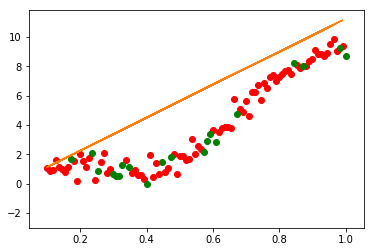

In [48]:
plt.scatter(train_x[:,1], train_y, color = 'r') # red training data
plt.scatter(test_x[:,1], test_y, color='g')     # green test data
plt.plot(train_x, train_x * w)
plt.show()

In [49]:
# The graphs shows the prediction is not so good. there is still better options. 